In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

# 한글 폰트 설정 (Windows 환경 가정)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 로드
df = pd.read_csv('final_scores.csv')
df.head()

,공부시간,출석률,SNS사용시간,캡스톤점수,최종성적
0,4.22,0.870,1.57,76.9,75.9
1,5.49,0.915,2.07,77.0,86.7
2,6.96,0.826,3.07,84.9,82.1
3,6.94,0.849,2.37,87.3,81.1
4,3.74,0.829,4.41,69.9,68.6


In [37]:
# 데이터 정보 및 결측치 확인
print("=== 데이터 정보 (Info) ===")
df.info()
print("\n=== 결측치 확인 ===")
print(df.isnull().sum())

=== 데이터 정보 (Info) ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   공부시간     50 non-null     float64
 1   출석률      50 non-null     float64
 2   SNS사용시간  50 non-null     float64
 3   캡스톤점수    50 non-null     float64
 4   최종성적     50 non-null     float64
dtypes: float64(5)
memory usage: 2.1 KB

=== 결측치 확인 ===
공부시간       0
출석률        0
SNS사용시간    0
캡스톤점수      0
최종성적       0
dtype: int64


In [38]:
# 파생변수 생성: 표준화된 최종성적 (Z-score)
# 평균 0, 표준편차 1로 변환하여 상대적 위치 파악
df['최종성적_Z'] = (df['최종성적'] - df['최종성적'].mean()) / df['최종성적'].std()

# 학점 부여 함수 및 파생변수 생성 (학점)
def get_grade(score):
    if score >= 90: return 'A'
    elif score >= 80: return 'B'
    elif score >= 70: return 'C'
    elif score >= 60: return 'D'
    else: return 'F'

df['학점'] = df['최종성적'].apply(get_grade)

print("=== 파생변수 생성 확인 (상위 5행) ===")
display(df[['최종성적', '최종성적_Z', '학점']].head())

=== 파생변수 생성 확인 (상위 5행) ===


,최종성적,최종성적_Z,학점
0,75.9,-0.425623,C
1,86.7,0.879524,B
2,82.1,0.323628,B
3,81.1,0.202781,B
4,68.6,-1.307806,D


## Chapter 02. 1차원 데이터 정리
각 변수의 기술통계량(평균, 분산, 표준편차 등)을 확인하고 히스토그램을 통해 분포를 시각화합니다.

=== 기술통계량 ===


,공부시간,출석률,SNS사용시간,캡스톤점수,최종성적,최종성적_Z
count,50.000000,50.000000,50.000000,50.000000,50.000000,5.000000e+01
mean,5.806400,0.889200,2.213200,79.204000,79.422000,-1.403322e-15
std,1.795392,0.062529,1.085854,6.593193,8.274926,1.000000e+00
min,2.000000,0.746000,0.500000,66.800000,57.300000,-2.673377e+00
25%,4.842500,0.830750,1.480000,74.025000,74.125000,-6.401266e-01
50%,6.070000,0.904000,2.075000,77.900000,80.250000,1.000613e-01
75%,6.930000,0.938750,2.875000,84.500000,85.875000,7.798257e-01
max,10.000000,1.000000,5.750000,94.200000,94.000000,1.761708e+00


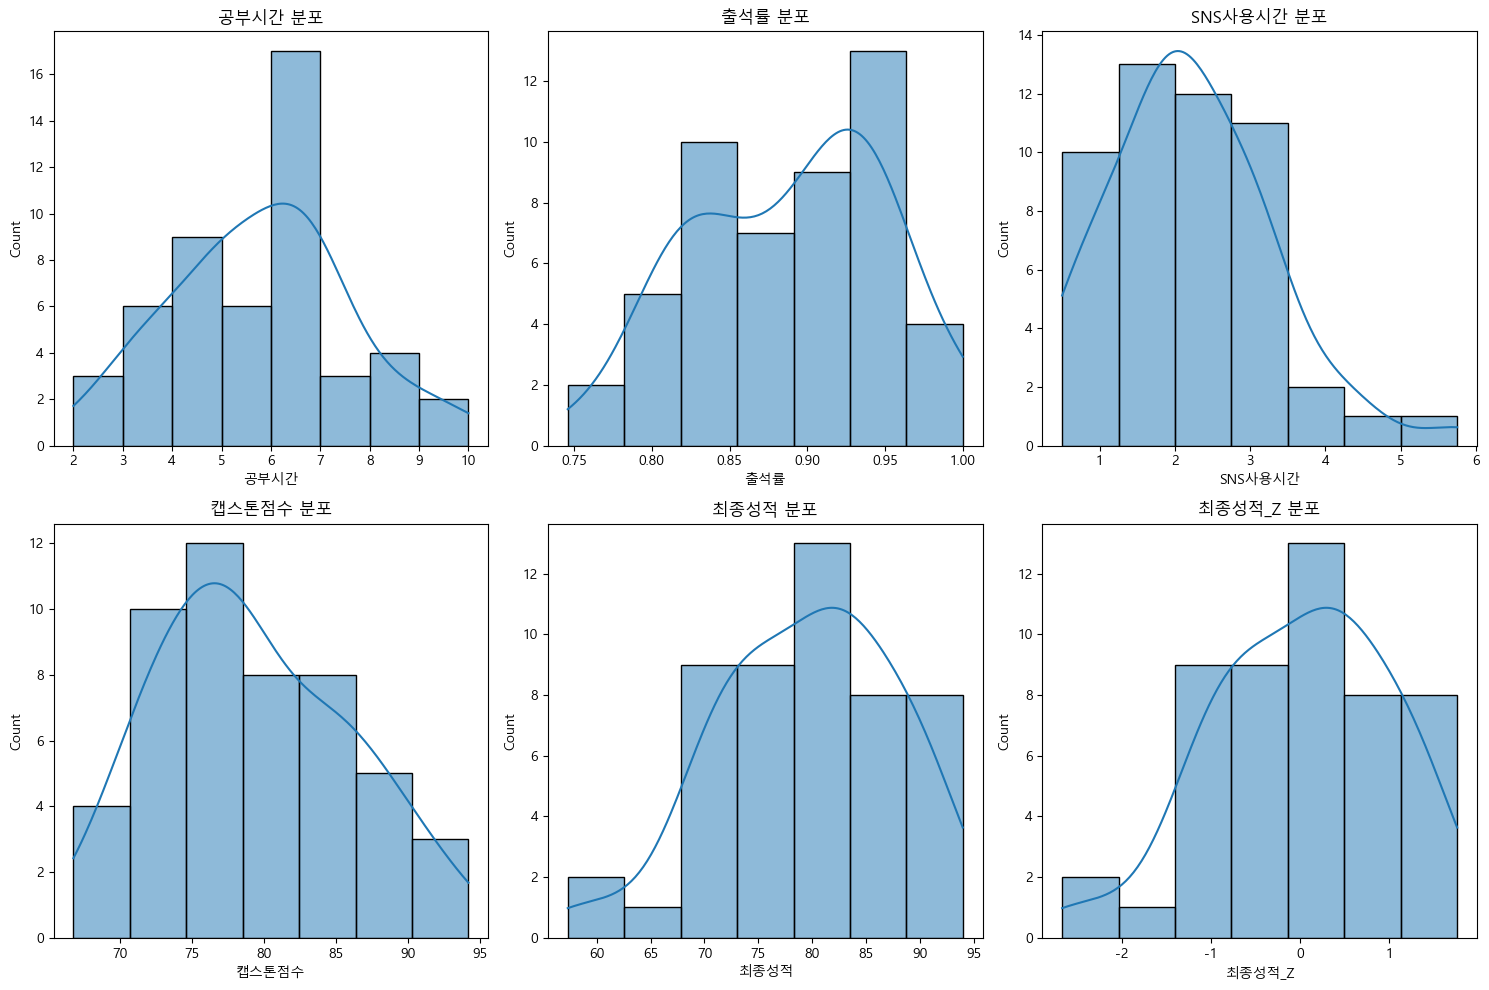

In [39]:
# 기술통계량 확인
print("=== 기술통계량 ===")
display(df.describe())

# 히스토그램 시각화
# 수치형 데이터만 선택 (오류 방지 및 시각화 적합성)
numeric_cols = df.select_dtypes(include=[np.number]).columns
n_cols = 3
n_rows = (len(numeric_cols) - 1) // n_cols + 1

plt.figure(figsize=(15, 5 * n_rows))
for i, col in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'{col} 분포')
plt.tight_layout()
plt.show()

### 추가 분석: 왜도(Skewness)와 첨도(Kurtosis) 및 이상치 탐지
데이터의 비대칭성을 나타내는 왜도와 뾰족한 정도를 나타내는 첨도를 확인하고, 박스플롯(Boxplot)을 통해 이상치를 시각적으로 탐지합니다.

=== 왜도(Skewness) ===
공부시간       0.131735
출석률       -0.212705
SNS사용시간    0.747636
캡스톤점수      0.339878
최종성적      -0.426105
최종성적_Z    -0.426105
dtype: float64

=== 첨도(Kurtosis) ===
공부시간      -0.159925
출석률       -0.785619
SNS사용시간    1.147424
캡스톤점수     -0.625570
최종성적      -0.105424
최종성적_Z    -0.105424
dtype: float64


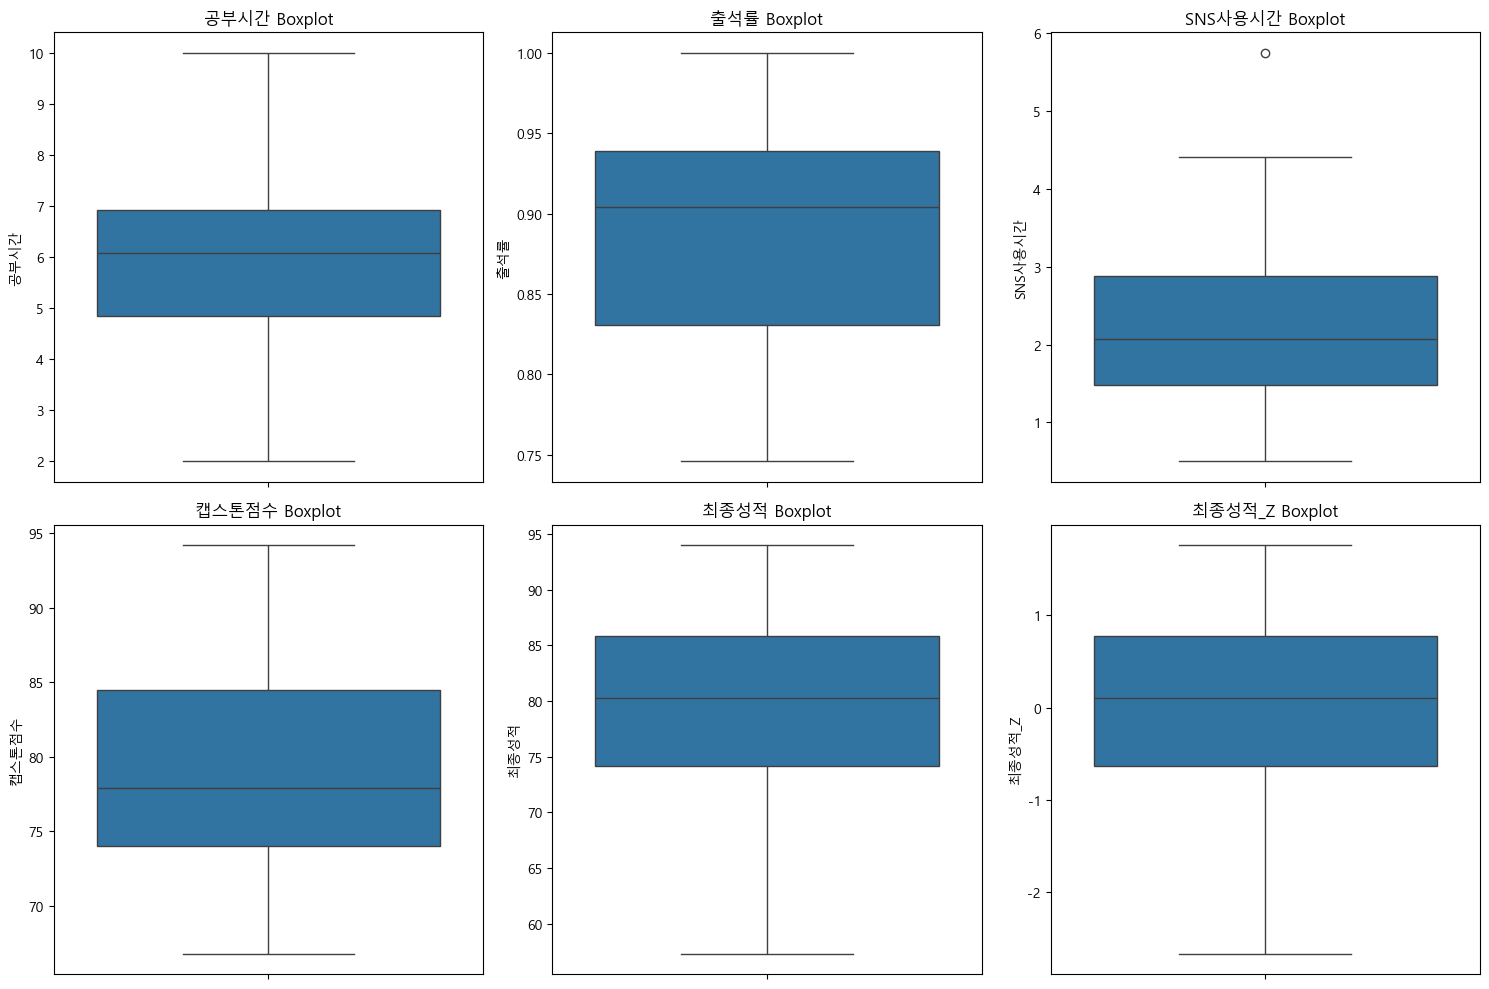

In [40]:
# 왜도와 첨도 계산
# 수치형 데이터만 선택 (오류 방지)
numeric_df = df.select_dtypes(include=[np.number])

print("=== 왜도(Skewness) ===")
print(numeric_df.skew())
print("\n=== 첨도(Kurtosis) ===")
print(numeric_df.kurtosis())

# 박스플롯 시각화
numeric_cols = numeric_df.columns
n_cols = 3
n_rows = (len(numeric_cols) - 1) // n_cols + 1

plt.figure(figsize=(15, 5 * n_rows))
for i, col in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'{col} Boxplot')
plt.tight_layout()
plt.show()

In [41]:
# 절사평균 (Trimmed Mean) 계산
# 상하위 10%를 제외한 평균으로, 이상치에 강건한 통계량
trimmed_mean = stats.trim_mean(df['최종성적'], 0.1)
print(f"최종성적 평균: {df['최종성적'].mean():.2f}")
print(f"최종성적 절사평균 (10%): {trimmed_mean:.2f}")

최종성적 평균: 79.42
최종성적 절사평균 (10%): 79.77


In [42]:
# 변동계수 (Coefficient of Variation, CV) 계산
# 표준편차를 평균으로 나눈 값으로, 단위가 다른 변수 간 산포 비교에 유용
cv = df.std(numeric_only=True) / df.mean(numeric_only=True)
print("=== 변동계수 (CV) ===")
print(cv.sort_values(ascending=False))

=== 변동계수 (CV) ===
SNS사용시간    4.906263e-01
공부시간       3.092091e-01
최종성적       1.041893e-01
캡스톤점수      8.324318e-02
출석률        7.032016e-02
최종성적_Z    -7.125949e+14
dtype: float64


## Chapter 03. 2차원 데이터 정리
변수 간의 상관관계를 분석하고, 산점도와 히트맵을 통해 시각화합니다.


=== 상관계수 행렬 ===


,공부시간,출석률,SNS사용시간,캡스톤점수,최종성적,최종성적_Z
공부시간,1.000000,0.553157,-0.735128,0.841072,0.774627,0.774627
출석률,0.553157,1.000000,-0.371226,0.509123,0.437992,0.437992
SNS사용시간,-0.735128,-0.371226,1.000000,-0.647690,-0.781501,-0.781501
캡스톤점수,0.841072,0.509123,-0.647690,1.000000,0.726798,0.726798
최종성적,0.774627,0.437992,-0.781501,0.726798,1.000000,1.000000
최종성적_Z,0.774627,0.437992,-0.781501,0.726798,1.000000,1.000000


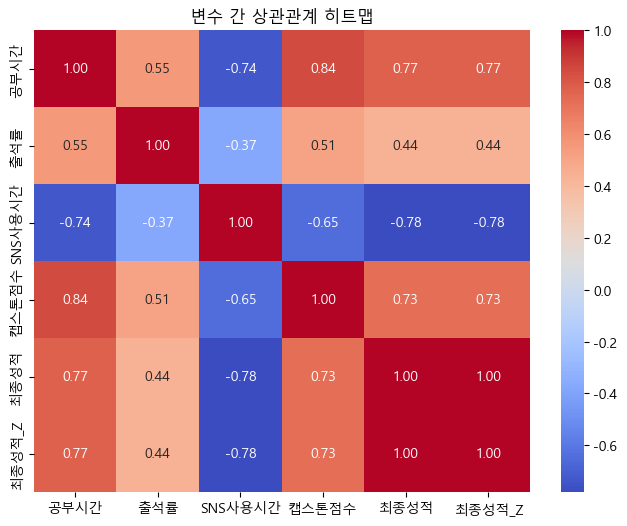

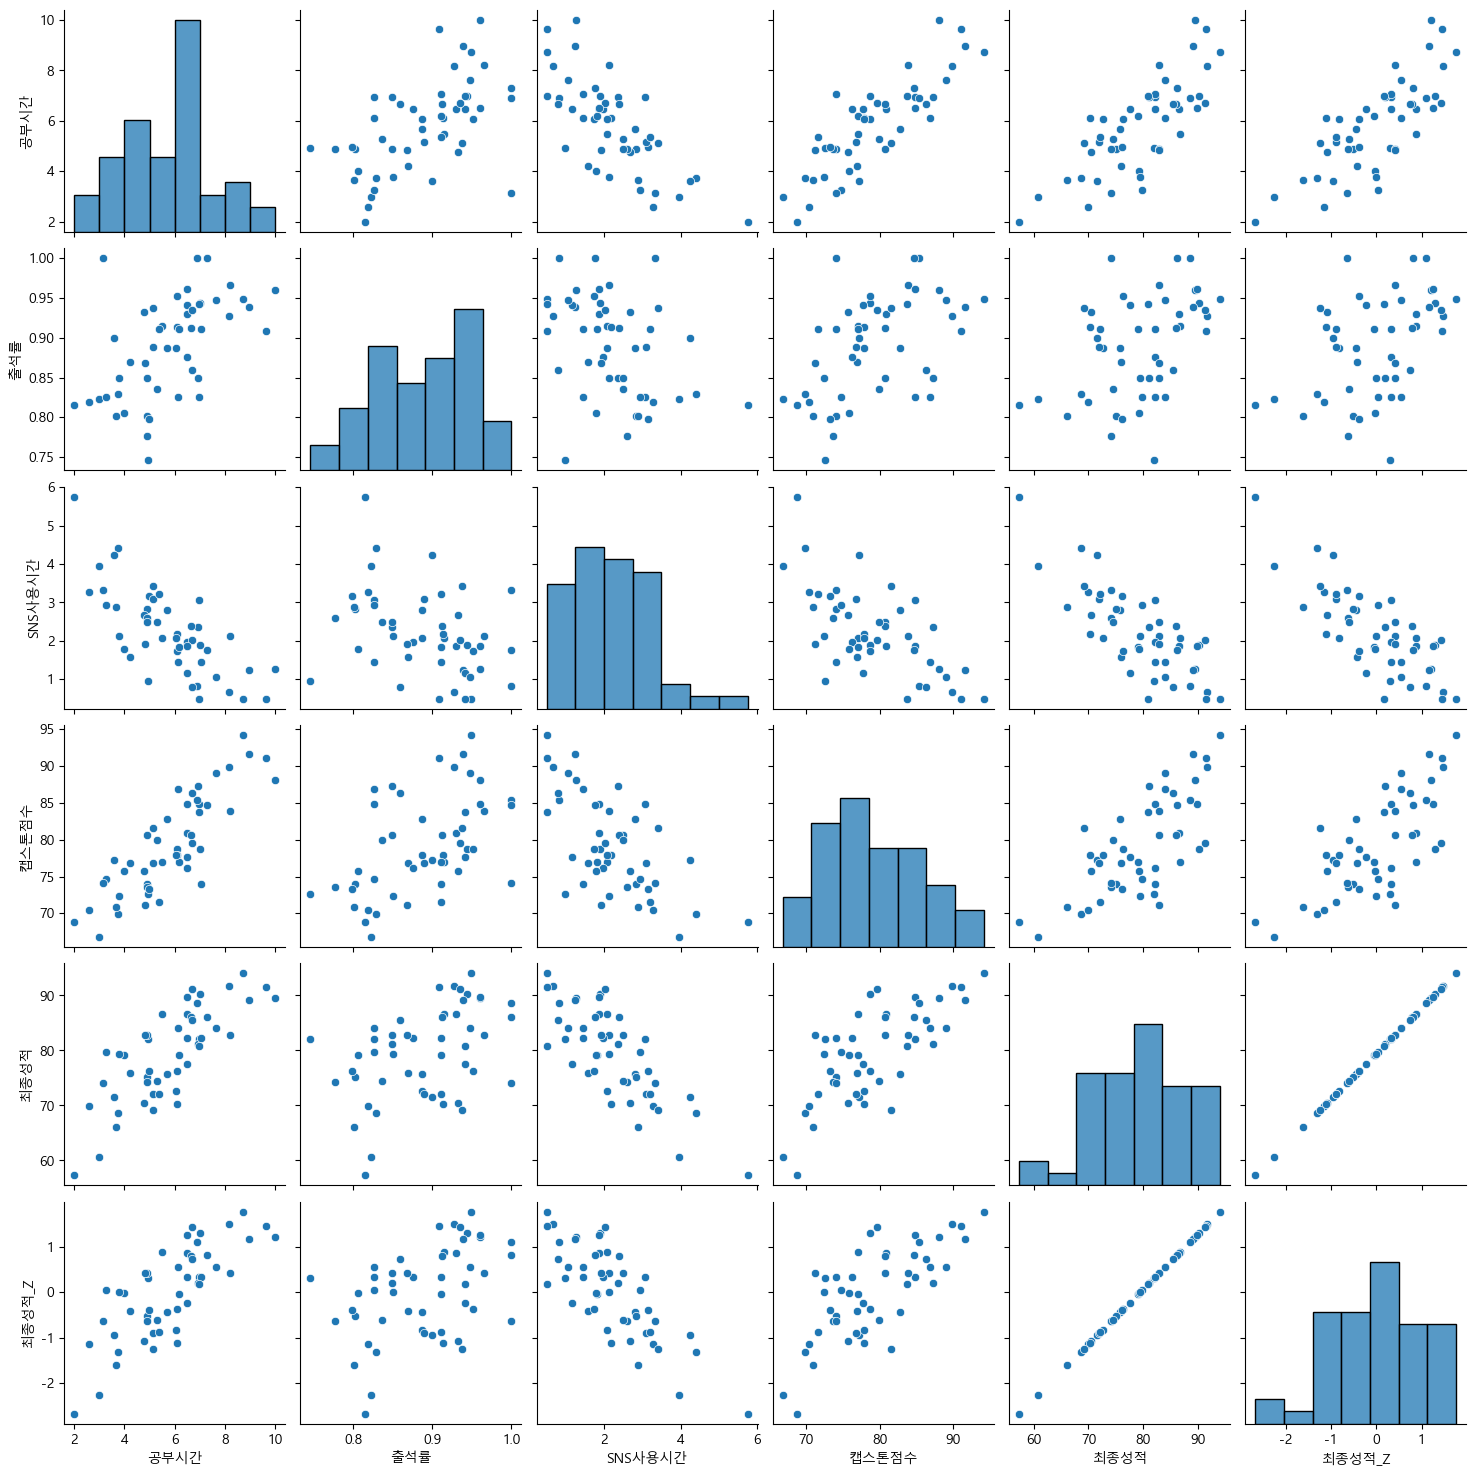

In [43]:
# 상관관계 분석
# 수치형 데이터만 선택 (오류 방지)
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()

print("\n=== 상관계수 행렬 ===")
display(corr_matrix)

# 상관관계 히트맵
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('변수 간 상관관계 히트맵')
plt.show()

# 산점도 행렬 (Pairplot)
sns.pairplot(df)
plt.show()

### 추가 분석: 주요 변수 간 회귀선 시각화
상관관계가 높은 변수 쌍에 대해 회귀선을 포함한 산점도를 그려 관계를 더 명확히 확인합니다.

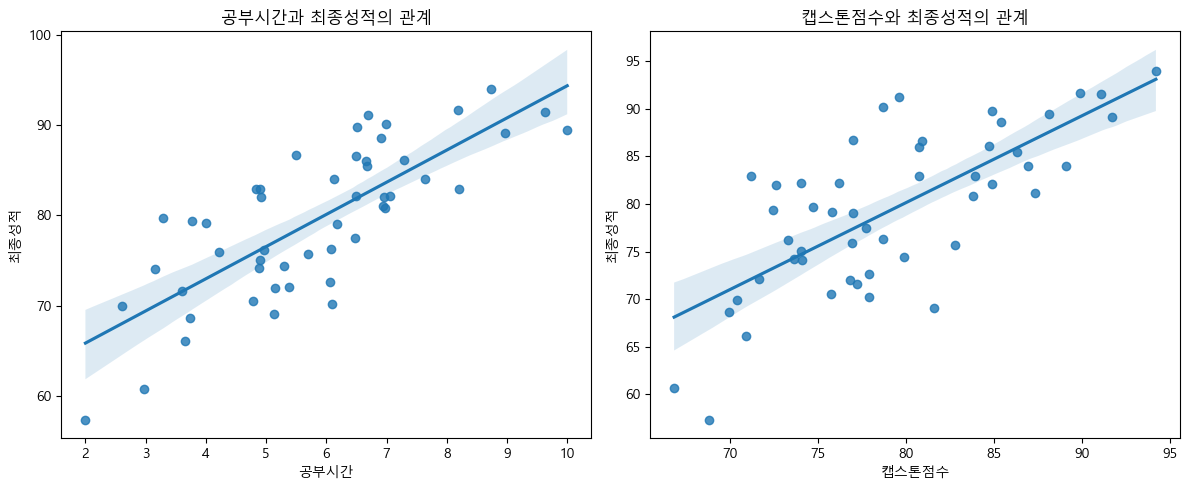

In [44]:
# 공부시간 vs 최종성적 회귀선
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.regplot(x='공부시간', y='최종성적', data=df)
plt.title('공부시간과 최종성적의 관계')

# 캡스톤점수 vs 최종성적 회귀선
plt.subplot(1, 2, 2)
sns.regplot(x='캡스톤점수', y='최종성적', data=df)
plt.title('캡스톤점수와 최종성적의 관계')

plt.tight_layout()
plt.show()

In [45]:
# 공분산 행렬 (Covariance Matrix)
# 두 변수가 함께 변하는 정도를 나타냄 (상관계수와 달리 단위에 의존)
cov_matrix = df[['공부시간', '출석률', 'SNS사용시간', '캡스톤점수', '최종성적']].cov()
print("=== 공분산 행렬 ===")
display(cov_matrix)

=== 공분산 행렬 ===


,공부시간,출석률,SNS사용시간,캡스톤점수,최종성적
공부시간,3.223432,0.062099,-1.433158,9.956076,11.508428
출석률,0.062099,0.003910,-0.025205,0.209893,0.226626
SNS사용시간,-1.433158,-0.025205,1.179079,-4.636972,-7.022072
캡스톤점수,9.956076,0.209893,-4.636972,43.470188,39.652767
최종성적,11.508428,0.226626,-7.022072,39.652767,68.474404


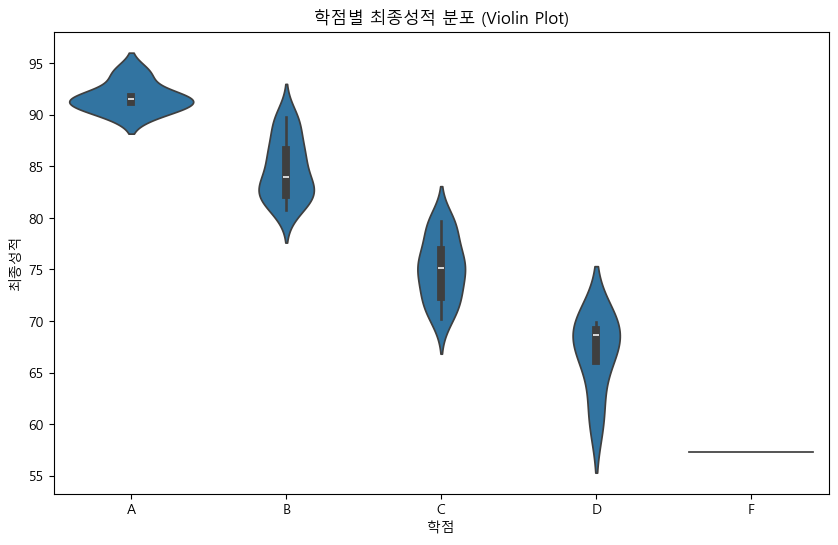

In [46]:
# 범주형 변수(학점)에 따른 수치형 변수(최종성적) 분포 시각화 (Violin Plot)
# Boxplot보다 데이터의 분포 밀도를 더 자세히 보여줌
plt.figure(figsize=(10, 6))
sns.violinplot(x='학점', y='최종성적', data=df, order=['A', 'B', 'C', 'D', 'F'])
plt.title('학점별 최종성적 분포 (Violin Plot)')
plt.show()

## Chapter 04~09. 확률변수와 분포
데이터가 특정 확률분포(예: 정규분포)를 따르는지 검정합니다.


=== 정규성 검정 (Shapiro-Wilk) ===
Statistic=0.976, p-value=0.391
결과: 최종성적은 정규분포를 따른다고 볼 수 있습니다. (귀무가설 기각 실패)


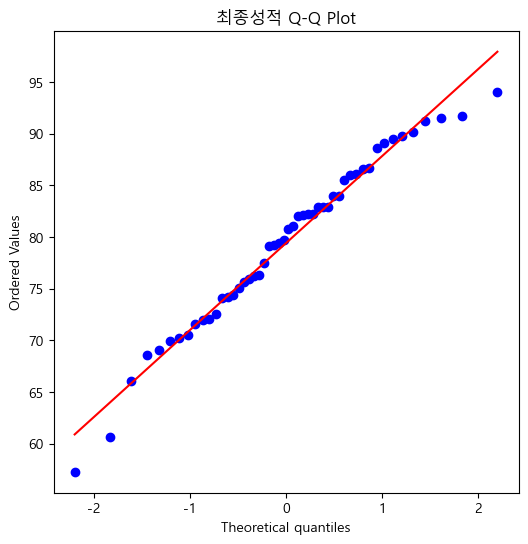

In [47]:
# 최종성적이 정규분포를 따르는지 검정 (Shapiro-Wilk Test)
stat, p_value = stats.shapiro(df['최종성적'])
print("\n=== 정규성 검정 (Shapiro-Wilk) ===")
print(f'Statistic={stat:.3f}, p-value={p_value:.3f}')
if p_value > 0.05:
    print("결과: 최종성적은 정규분포를 따른다고 볼 수 있습니다. (귀무가설 기각 실패)")
else:
    print("결과: 최종성적은 정규분포를 따르지 않는다고 볼 수 있습니다. (귀무가설 기각)")

# QQ-plot
plt.figure(figsize=(6, 6))
stats.probplot(df['최종성적'], dist="norm", plot=plt)
plt.title('최종성적 Q-Q Plot')
plt.show()

### 추가 분석: 중심극한정리(CLT) 시뮬레이션 (Chapter 09)
모집단(최종성적)에서 표본을 무작위로 추출하여 표본평균의 분포가 정규분포에 가까워지는지 확인합니다.

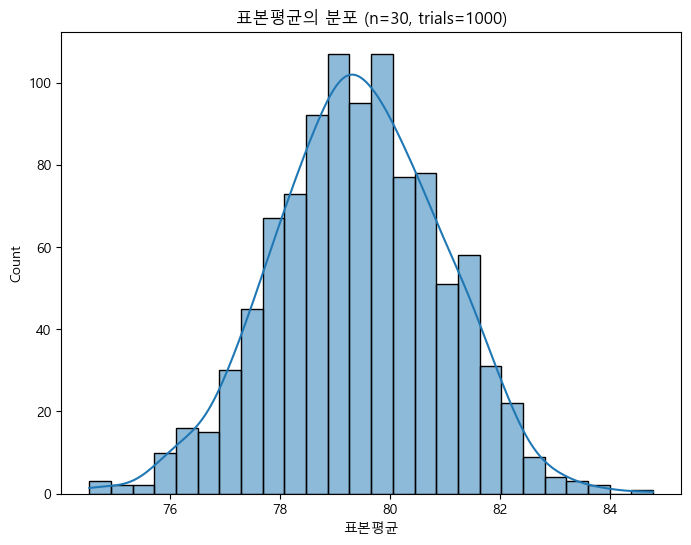

표본평균 분포의 Shapiro-Wilk p-value: 0.897


In [48]:
# 중심극한정리 시뮬레이션
population = df['최종성적']
sample_means = []
n_samples = 30  # 표본 크기
n_trials = 1000 # 시행 횟수

for _ in range(n_trials):
    sample = np.random.choice(population, n_samples, replace=True)
    sample_means.append(np.mean(sample))

plt.figure(figsize=(8, 6))
sns.histplot(sample_means, kde=True)
plt.title(f'표본평균의 분포 (n={n_samples}, trials={n_trials})')
plt.xlabel('표본평균')
plt.show()

# 표본평균의 정규성 검정
stat_clt, p_val_clt = stats.shapiro(sample_means)
print(f"표본평균 분포의 Shapiro-Wilk p-value: {p_val_clt:.3f}")

### 추가 분석: 이산형 확률변수화 (Chapter 05~06)
연속형 변수인 '최종성적'을 학점(A, B, C...) 구간으로 나누어 이산형 변수로 변환하고 빈도수를 분석합니다.

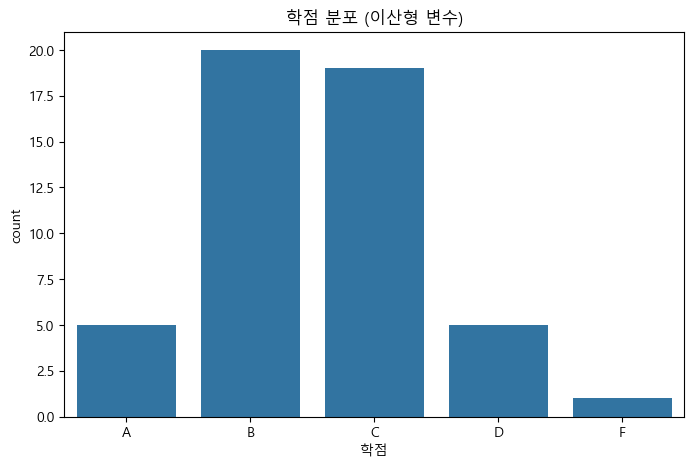

=== 학점별 평균 공부시간 ===
학점
A    8.048000
B    6.801500
C    4.945263
D    3.618000
F    2.000000
Name: 공부시간, dtype: float64


In [49]:
# 학점 분포 시각화
plt.figure(figsize=(8, 5))
sns.countplot(x='학점', data=df, order=['A', 'B', 'C', 'D', 'F'])
plt.title('학점 분포 (이산형 변수)')
plt.show()

# 학점별 평균 공부시간
print("=== 학점별 평균 공부시간 ===")
print(df.groupby('학점')['공부시간'].mean())

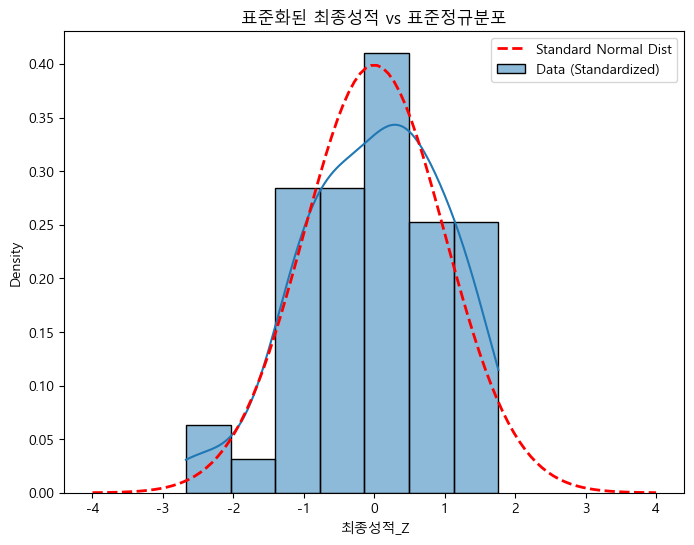

In [50]:
# 표준정규분포와 데이터 비교 시각화
# 데이터를 표준화(Z-score)하여 표준정규분포 곡선과 겹쳐 그리기
plt.figure(figsize=(8, 6))
sns.histplot(df['최종성적_Z'], kde=True, stat="density", label="Data (Standardized)")
x = np.linspace(-4, 4, 100)
plt.plot(x, stats.norm.pdf(x), 'r--', linewidth=2, label="Standard Normal Dist")
plt.title('표준화된 최종성적 vs 표준정규분포')
plt.legend()
plt.show()

In [51]:
# 확률 계산 (정규분포 가정)
# 예: 최종성적이 85점 이상일 확률은?
mu = df['최종성적'].mean()
sigma = df['최종성적'].std()
prob_over_85 = 1 - stats.norm.cdf(85, loc=mu, scale=sigma)

print(f"평균: {mu:.2f}, 표준편차: {sigma:.2f}")
print(f"최종성적이 85점 이상일 확률 (이론적): {prob_over_85:.2%}")
print(f"실제 데이터에서 85점 이상 비율: {(df['최종성적'] >= 85).mean():.2%}")

평균: 79.42, 표준편차: 8.27
최종성적이 85점 이상일 확률 (이론적): 25.01%
실제 데이터에서 85점 이상 비율: 28.00%


## Chapter 10. 통계적 추정
표본 데이터를 바탕으로 모평균을 추정합니다 (점추정 및 구간추정).

In [52]:
# 최종성적의 모평균에 대한 95% 신뢰구간 추정
mean_score = df['최종성적'].mean()
std_score = df['최종성적'].std(ddof=1)
n = len(df)

# t-분포 사용 (표본 크기가 작거나 모분산을 모를 때 일반적)
confidence_interval = stats.t.interval(0.95, df=n-1, loc=mean_score, scale=std_score/np.sqrt(n))
print("\n=== 모평균 추정 (95% 신뢰구간) ===")
print(f"표본평균: {mean_score:.2f}")
print(f"95% 신뢰구간: {confidence_interval}")


=== 모평균 추정 (95% 신뢰구간) ===
표본평균: 79.42
95% 신뢰구간: (np.float64(77.07029198649535), np.float64(81.77370801350467))


### 추가 분석: 모분산의 신뢰구간 추정
카이제곱 분포를 이용하여 최종성적의 모분산에 대한 95% 신뢰구간을 추정합니다.

In [53]:
# 모분산 신뢰구간 계산
sample_var = df['최종성적'].var(ddof=1)
n = len(df)
alpha = 0.05

# 카이제곱 임계값
chi2_lower = stats.chi2.ppf(alpha/2, df=n-1)
chi2_upper = stats.chi2.ppf(1-alpha/2, df=n-1)

# 신뢰구간
var_lower = (n-1) * sample_var / chi2_upper
var_upper = (n-1) * sample_var / chi2_lower

print(f"표본분산: {sample_var:.2f}")
print(f"모분산 95% 신뢰구간: [{var_lower:.2f}, {var_upper:.2f}]")

표본분산: 68.47
모분산 95% 신뢰구간: [47.78, 106.33]


In [54]:
# 모비율 추정 (점추정 및 구간추정)
# 예: 최종성적이 80점 이상인 학생의 비율 추정
success_count = (df['최종성적'] >= 80).sum()
n = len(df)
p_hat = success_count / n

# 95% 신뢰구간 (정규근사)
# np > 5, n(1-p) > 5 조건을 만족한다고 가정
z_alpha = stats.norm.ppf(0.975)
margin_of_error = z_alpha * np.sqrt((p_hat * (1 - p_hat)) / n)
ci_lower = p_hat - margin_of_error
ci_upper = p_hat + margin_of_error

print("=== 모비율 추정 (80점 이상) ===")
print(f"표본비율: {p_hat:.2f}")
print(f"95% 신뢰구간: [{ci_lower:.2f}, {ci_upper:.2f}]")

=== 모비율 추정 (80점 이상) ===
표본비율: 0.50
95% 신뢰구간: [0.36, 0.64]


=== 부트스트랩 평균 신뢰구간 ===
95% 신뢰구간: [77.09, 81.63]

95% 신뢰구간: [77.09, 81.63]


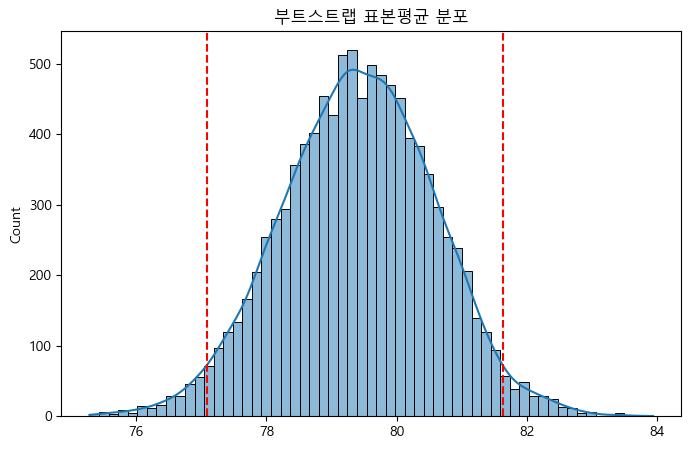

In [55]:
# 부트스트랩(Bootstrap)을 이용한 평균의 신뢰구간 추정
# 모분포에 대한 가정 없이 표본에서 복원추출을 반복하여 추정
bootstrap_means = []
for _ in range(10000):
    sample = np.random.choice(df['최종성적'], size=len(df), replace=True)
    bootstrap_means.append(np.mean(sample))

boot_ci_lower = np.percentile(bootstrap_means, 2.5)
boot_ci_upper = np.percentile(bootstrap_means, 97.5)

print("=== 부트스트랩 평균 신뢰구간 ===")
print(f"95% 신뢰구간: [{boot_ci_lower:.2f}, {boot_ci_upper:.2f}]")
plt.figure(figsize=(8, 5))
sns.histplot(bootstrap_means, kde=True)
plt.axvline(boot_ci_lower, color='red', linestyle='--')
plt.axvline(boot_ci_upper, color='red', linestyle='--')
plt.title('부트스트랩 표본평균 분포')
plt.show()

## Chapter 11. 통계적 가설검정
두 그룹 간의 평균 차이가 유의미한지 검정합니다 (t-test).

In [56]:
# 가설: SNS 사용시간이 평균보다 많은 그룹과 적은 그룹 간에 최종성적 차이가 있는가?
sns_mean = df['SNS사용시간'].mean()
group_high_sns = df[df['SNS사용시간'] >= sns_mean]['최종성적']
group_low_sns = df[df['SNS사용시간'] < sns_mean]['최종성적']

# 등분산 검정 (Levene's test)
lev_stat, lev_p = stats.levene(group_high_sns, group_low_sns)
equal_var = lev_p > 0.05

# t-test 수행
t_stat, p_val = stats.ttest_ind(group_high_sns, group_low_sns, equal_var=equal_var)

print("\n=== 가설검정 (t-test) ===")
print(f"SNS 사용시간 기준값(평균): {sns_mean:.2f}")
print(f"High 그룹(n={len(group_high_sns)}) 평균 성적: {group_high_sns.mean():.2f}")
print(f"Low 그룹(n={len(group_low_sns)}) 평균 성적: {group_low_sns.mean():.2f}")
print(f"t-statistic: {t_stat:.3f}, p-value: {p_val:.3f}")

if p_val < 0.05:
    print("결과: 두 그룹 간의 최종성적 차이는 통계적으로 유의합니다.")
else:
    print("결과: 두 그룹 간의 최종성적 차이는 통계적으로 유의하지 않습니다.")


=== 가설검정 (t-test) ===
SNS 사용시간 기준값(평균): 2.21
High 그룹(n=21) 평균 성적: 73.30
Low 그룹(n=29) 평균 성적: 83.85
t-statistic: -5.702, p-value: 0.000
결과: 두 그룹 간의 최종성적 차이는 통계적으로 유의합니다.


### 추가 분석: 단일표본 t-검정 및 카이제곱 독립성 검정
1. **단일표본 t-검정**: 우리 반의 평균 성적이 75점과 통계적으로 다른지 검정합니다.
2. **카이제곱 독립성 검정**: '공부시간'을 상/하로 나누었을 때, '학점' 분포와 독립적인지 검정합니다.

In [57]:
# 1. 단일표본 t-검정 (H0: mu = 75)
t_stat_1samp, p_val_1samp = stats.ttest_1samp(df['최종성적'], 75)
print("=== 단일표본 t-검정 (Test Value=75) ===")
print(f"t-statistic: {t_stat_1samp:.3f}, p-value: {p_val_1samp:.3f}")

# 2. 카이제곱 독립성 검정
# 공부시간을 평균 기준으로 High/Low로 범주화
df['공부시간_Level'] = np.where(df['공부시간'] >= df['공부시간'].mean(), 'High', 'Low')

# 교차표 생성 (공부시간 Level vs 학점)
contingency_table = pd.crosstab(df['공부시간_Level'], df['학점'])
print("\n=== 교차표 (Contingency Table) ===")
display(contingency_table)

# 카이제곱 검정
chi2, p_chi2, dof, expected = stats.chi2_contingency(contingency_table)
print(f"\n카이제곱 통계량: {chi2:.3f}, p-value: {p_chi2:.3f}")

=== 단일표본 t-검정 (Test Value=75) ===
t-statistic: 3.779, p-value: 0.000

=== 교차표 (Contingency Table) ===


학점,A,B,C,D,F
공부시간_Level,,,,,
High,5,16,5,0,0
Low,0,4,14,5,1



카이제곱 통계량: 22.419, p-value: 0.000


In [58]:
# 대응표본 t-검정 (Paired t-test) 시뮬레이션
# 가상 시나리오: 중간고사 성적이 최종성적보다 평균 2점 낮았다고 가정하고 차이 검정
np.random.seed(42)
midterm_scores = df['최종성적'] - np.random.normal(loc=2, scale=3, size=len(df))
# 점수 범위 제한 (0~100)
midterm_scores = np.clip(midterm_scores, 0, 100)

t_stat_paired, p_val_paired = stats.ttest_rel(df['최종성적'], midterm_scores)

print("=== 대응표본 t-검정 (최종성적 vs 가상 중간고사) ===")
print(f"최종성적 평균: {df['최종성적'].mean():.2f}")
print(f"중간고사 평균: {midterm_scores.mean():.2f}")
print(f"t-statistic: {t_stat_paired:.3f}, p-value: {p_val_paired:.3f}")

=== 대응표본 t-검정 (최종성적 vs 가상 중간고사) ===
최종성적 평균: 79.42
중간고사 평균: 78.10
t-statistic: 3.341, p-value: 0.002


In [59]:
# 등분산 검정 (F-test)
# 두 그룹(SNS 사용시간 High/Low)의 분산이 같은지 검정
# Python scipy에는 F-test 함수가 직접적으로 없으므로 통계량 직접 계산
var_high = group_high_sns.var(ddof=1)
var_low = group_low_sns.var(ddof=1)

# F-통계량은 큰 분산을 작은 분산으로 나눈 값
if var_high > var_low:
    f_stat = var_high / var_low
    df1, df2 = len(group_high_sns)-1, len(group_low_sns)-1
else:
    f_stat = var_low / var_high
    df1, df2 = len(group_low_sns)-1, len(group_high_sns)-1

p_val_f = 2 * (1 - stats.f.cdf(f_stat, df1, df2)) # 양측검정

print("=== 등분산 검정 (F-test) ===")
print(f"F-statistic: {f_stat:.3f}, p-value: {p_val_f:.3f}")
print(f"High 그룹 분산: {var_high:.2f}, Low 그룹 분산: {var_low:.2f}")

=== 등분산 검정 (F-test) ===
F-statistic: 1.357, p-value: 0.449
High 그룹 분산: 49.23, Low 그룹 분산: 36.28


## Chapter 12. 회귀분석
여러 독립변수(공부시간, 출석률 등)가 종속변수(최종성적)에 미치는 영향을 분석합니다.

In [60]:
# 다중선형회귀: 공부시간, 출석률, SNS사용시간, 캡스톤점수로 최종성적 예측
X = df[['공부시간', '출석률', 'SNS사용시간', '캡스톤점수']]
y = df['최종성적']

# 상수항 추가 (절편)
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print("\n=== 회귀분석 결과 ===")
print(model.summary())


=== 회귀분석 결과 ===
                            OLS Regression Results                            
Dep. Variable:                   최종성적   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     27.73
Date:                Sat, 06 Dec 2025   Prob (F-statistic):           1.23e-11
Time:                        16:32:06   Log-Likelihood:                -145.04
No. Observations:                  50   AIC:                             300.1
Df Residuals:                      45   BIC:                             309.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         56.6771     15.295   

### 추가 분석: 잔차 분석 (Residual Analysis)
회귀분석의 가정(선형성, 정규성, 등분산성)을 만족하는지 확인하기 위해 잔차를 분석합니다.

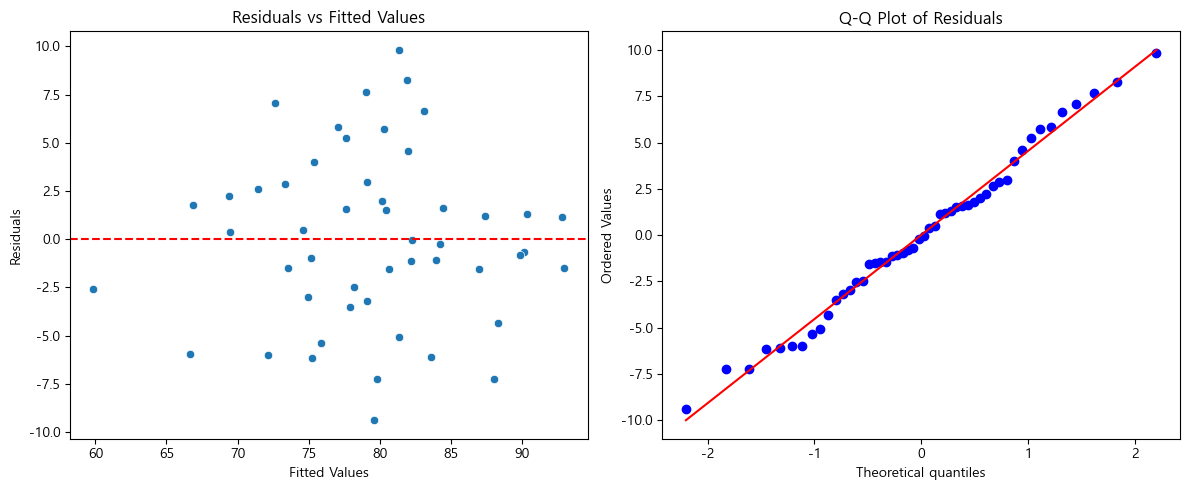

잔차의 Shapiro-Wilk p-value: 0.836


In [61]:
# 잔차 계산
residuals = model.resid
fitted_values = model.fittedvalues

# 1. 잔차 vs 예측값 (등분산성, 선형성 확인)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=fitted_values, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')

# 2. 잔차의 정규성 (Q-Q Plot)
plt.subplot(1, 2, 2)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')

plt.tight_layout()
plt.show()

# 잔차의 정규성 검정
stat_res, p_val_res = stats.shapiro(residuals)
print(f"잔차의 Shapiro-Wilk p-value: {p_val_res:.3f}")

In [62]:
# 단순선형회귀 분석 (비교용)
# 가장 상관관계가 높은 변수 하나만 사용하여 회귀분석 수행
# 상관계수가 가장 높은 변수 찾기
target = '최종성적'

# 수치형 데이터만 선택하여 상관계수 계산 (오류 방지)
numeric_df = df.select_dtypes(include=[np.number])
correlations = numeric_df.corr()[target].drop(target).abs()
best_predictor = correlations.idxmax()

X_simple = sm.add_constant(df[best_predictor])
model_simple = sm.OLS(y, X_simple).fit()

print(f"=== 단순선형회귀 ({best_predictor} -> {target}) ===")
print(f"R-squared: {model_simple.rsquared:.3f}")
print(model_simple.summary().tables[1])

=== 단순선형회귀 (최종성적_Z -> 최종성적) ===
R-squared: 1.000
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         79.4220   2.08e-15   3.82e+16      0.000      79.422      79.422
최종성적_Z         8.2749    2.1e-15   3.94e+15      0.000       8.275       8.275


In [63]:
# 새로운 데이터에 대한 예측
# 가상의 학생 데이터 생성 (공부시간, 출석률, SNS사용시간, 캡스톤점수)
new_student = pd.DataFrame({
    'const': [1.0], # 상수항
    '공부시간': [8.0],
    '출석률': [0.95],
    'SNS사용시간': [1.0],
    '캡스톤점수': [85.0]
})

predicted_score = model.predict(new_student)
print("=== 새로운 학생 성적 예측 ===")
print("입력 데이터:")
display(new_student.drop('const', axis=1))
print(f"예측된 최종성적: {predicted_score[0]:.2f}점")

=== 새로운 학생 성적 예측 ===
입력 데이터:


,공부시간,출석률,SNS사용시간,캡스톤점수
0,8.0,0.95,1.0,85.0


예측된 최종성적: 87.87점
